<a href="https://colab.research.google.com/github/chitinglow/Covid19/blob/master/COVID19_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on COVID-19

## Data Description

1.) Case Data - Data of COVID-19 infection cases in South Korea
<br/> 
<br/>
2.) Patient Data  
&nbsp;&nbsp;i. PatientInfo: Epidemiological data of COVID-19 patients in South Korea
<br/>
&nbsp;&nbsp;ii. PatientRoute: Route data of COVID-19 patients in South Korea
<br/>
<br/>
3.) Time Series data
<br/>
&nbsp;&nbsp;i. Time: Time series data of COVID-19 status in South Korea
<br/>
&nbsp;&nbsp;ii. TimeAge: Time series data of COVID-19 status in terms of the age in South Korea
<br/>
&nbsp;&nbsp;iii. TimeGender: Time series data of COVID-19 status in terms of gender in South Korea
<br/>
&nbsp;&nbsp;iv.TimeProvince: Time series data of COVID-19 status in terms of the Province in South Korea
<br/>
<br/>
4) Additional Data
<br/>
&nbsp;&nbsp;i. Region: Location and statistical data of the regions in South Korea
<br/>
&nbsp;&nbsp;ii. Weather: Data of the weather in the regions of South Korea
<br/>
&nbsp;&nbsp;iii. SearchTrend: Trend data of the keywords searched in NAVER which is one of the largest portals in South Korea
<br/>
&nbsp;&nbsp;iv. SeoulFloating: Data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub)

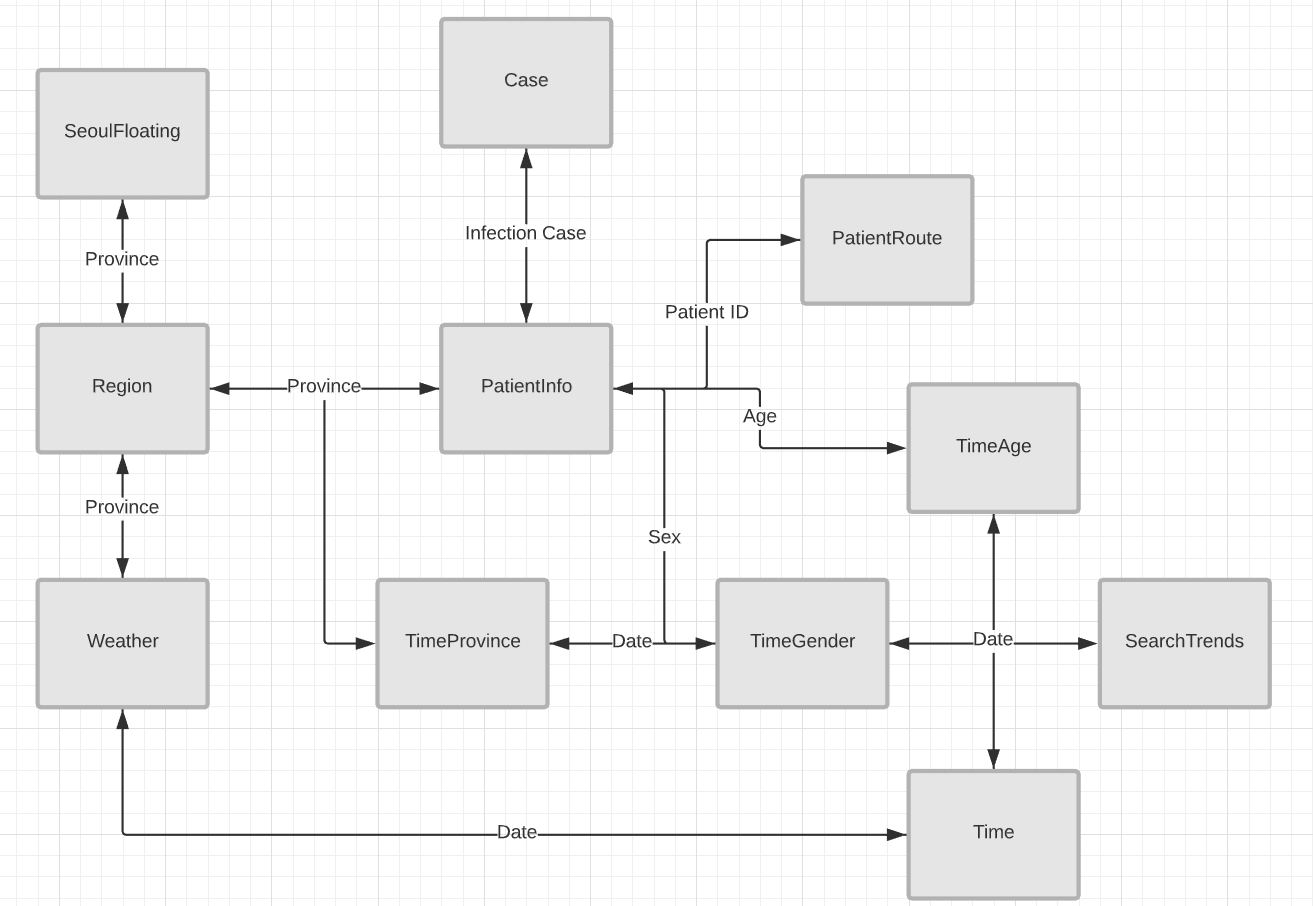

In [206]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="/content/drive/My Drive/Colab Notebooks/Data Mapping.PNG")

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import pandas_profiling

#case data
case = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Case.csv")

#patient data
patientinfo = pd.read_csv("/content/drive/My Drive/Colab Notebooks/PatientInfo.csv")
patientroute = pd.read_csv("/content/drive/My Drive/Colab Notebooks/PatientRoute.csv")

#time series data
time = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time.csv')
timeage = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TimeAge.csv')
timegender = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TimeGender.csv')
timeprovince = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TimeProvince.csv')

#additional data
region = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Region.csv')
weather = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Weather.csv')
searchtrend = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SearchTrend.csv')
searchfloating = pd.read_csv("/content/drive/My Drive/Colab Notebooks/SeoulFloating.csv")

# Data information

## Case 

### Description of the case variables

* Case id: Unique identifier of infection case
* Province: Special City/Metropolitan City/Province
* City: City/Country/District
* Group: TRUE (group infection); FALSE (not group)
* Infection case: Infection case based on different cluster
* Confirmed: The accumulated number of the comfirmed
* Latitude: The latitude of the infection group
* Longitude: The longitude of the infection group 

In [209]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   case_id         111 non-null    int64 
 1   province        111 non-null    object
 2   city            111 non-null    object
 3   group           111 non-null    bool  
 4   infection_case  111 non-null    object
 5   confirmed       111 non-null    int64 
 6   latitude        111 non-null    object
 7   longitude       111 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 6.3+ KB


In [210]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [211]:
#descriptive stats for numerical values
case[['confirmed']].describe()

,confirmed
count,111.000000
mean,87.270270
std,441.976345
min,0.000000
25%,5.000000
50%,10.000000
75%,31.000000
max,4508.000000


In [212]:
#Checking for missing values
case.isnull().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

## Patient Section

### Description of Patient Info

* Patient id: Unique identifier of the patient
* Global num: The number given by KCDC
* Sex : Patient's sex
* Birth year: The birth year of the patient
* Age: The age of the patient (in group)
* Country: The country of the patient
* Province: The province of the patient
* City: The city of the patient
* Disease: TRUE (underlying disease); FALSE (no disease)
* Infection case: The case of infection
* Infection order: The order of infection
* Infected by: The ID of who infected the patient
* Contact Number: The number of contacts with people
* Symptom onset date: The date of symptom onset
* Confirmed date: The date of being confirmed
* Released date: The date of being released
* Deceased date: The date of being deceased
* State: isolated/relleased/deceased

In [213]:
patientinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3253 non-null   int64  
 1   global_num          2082 non-null   float64
 2   sex                 3200 non-null   object 
 3   birth_year          2833 non-null   float64
 4   age                 3192 non-null   object 
 5   country             3142 non-null   object 
 6   province            3253 non-null   object 
 7   city                3177 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2441 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         763 non-null    float64
 12  contact_number      597 non-null    float64
 13  symptom_onset_date  462 non-null    object 
 14  confirmed_date      3253 non-null   object 
 15  released_date       1137 non-null   object 
 16  deceas

In [214]:
patientinfo.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [215]:
patientinfo.age.value_counts()

20s     779
50s     582
40s     445
30s     418
60s     390
70s     195
80s     154
10s     136
0s       47
90s      45
100s      1
Name: age, dtype: int64

In [216]:
patientinfo.state.value_counts()

isolated    1747
released    1439
deceased      67
Name: state, dtype: int64

In [217]:
patientinfo.age.value_counts()
patientinfo.state.value_counts()

isolated    1747
released    1439
deceased      67
Name: state, dtype: int64

### Description of Patient Route

* Patient id: Unique identifier of the patient
* Global num: The number given by KCDC
* Date: Date of the route (format: YYYY-MM-DD)
* Province: Name of Province
* City: Name of City
* Type: Location type (gym, hospital, etc...)
* Latitude: Route latitude
* Longitude: Route longitude

In [218]:
patientroute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5321 entries, 0 to 5320
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  5321 non-null   int64  
 1   global_num  1081 non-null   float64
 2   date        5321 non-null   object 
 3   province    5321 non-null   object 
 4   city        5321 non-null   object 
 5   type        5321 non-null   object 
 6   latitude    5321 non-null   float64
 7   longitude   5321 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 332.7+ KB


In [219]:
patientroute.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [220]:
patientroute[['global_num']].describe()

,global_num
count,1081.000000
mean,2700.370953
std,2874.370561
min,2.000000
25%,298.000000
50%,1370.000000
75%,4224.000000
max,9082.000000


## Time Section

### Description of Time series data

* Date: Date of reported case (format: YYYY-MM-DD)
* Time: Time of case (24 Hour format)
* Test: The accumulated number of tests
* Negative: The accumulated number of negative results
* Comfirmed: The accumulated number of positive results
* Released: The accumulated number of releases
* Deceased: The accumulated number of deceases


In [221]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       85 non-null     object
 1   time       85 non-null     int64 
 2   test       85 non-null     int64 
 3   negative   85 non-null     int64 
 4   confirmed  85 non-null     int64 
 5   released   85 non-null     int64 
 6   deceased   85 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.8+ KB


In [222]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [223]:
time.describe()

,time,test,negative,confirmed,released,deceased
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,7.905882,176692.447059,160680.811765,4573.588235,1691.094118,60.894118
std,8.046921,183124.164954,173503.582977,4367.632764,2549.754450,72.455245
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3110.000000,2552.000000,27.000000,4.000000,0.000000
50%,0.000000,109591.000000,71580.000000,4212.000000,31.000000,22.000000
75%,16.000000,338036.000000,315447.000000,8961.000000,3166.000000,111.000000
max,16.000000,518743.000000,494815.000000,10537.000000,7447.000000,217.000000


### Description of Time series data of COVID-19 status in terms of the age

* Date: Date of cases (format: YYYY-MM-DD)
* Time: Time (24 Hours format)
* Age: The age of patients (Age group in 10 years format)
* Comfirmed: The accumulated number of the confirmed case
* Deceased: The accumulated number of the deceased case

In [224]:
timeage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       387 non-null    object
 1   time       387 non-null    int64 
 2   age        387 non-null    object
 3   confirmed  387 non-null    int64 
 4   deceased   387 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.2+ KB


In [225]:
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [226]:
timeage.describe()

,time,confirmed,deceased
count,387.0,387.000000,387.000000
mean,0.0,963.503876,13.105943
std,0.0,712.198877,22.087828
min,0.0,32.000000,0.000000
25%,0.0,440.000000,0.000000
50%,0.0,833.000000,1.000000
75%,0.0,1313.000000,16.500000
max,0.0,2879.000000,103.000000


### Description of Time series data in term of gender

* Date: Date of cases (format: YYYY-MM-DD)
* Time: Time (24 Hours format)
* Sex: The gender of patients
* Comfirmed: The accumulated number of the confirmed case
* Deceased: The accumulated number of the deceased case

In [227]:
timegender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       86 non-null     object
 1   time       86 non-null     int64 
 2   sex        86 non-null     object
 3   confirmed  86 non-null     int64 
 4   deceased   86 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.5+ KB


In [228]:
timegender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [229]:
timegender.describe()

,time,confirmed,deceased
count,86.0,86.000000,86.000000
mean,0.0,4335.651163,58.965116
std,0.0,1257.367406,30.655370
min,0.0,1591.000000,9.000000
25%,0.0,3345.750000,33.250000
50%,0.0,4174.000000,56.500000
75%,0.0,5494.750000,83.750000
max,0.0,6294.000000,115.000000


### Description of Time series data in term of Province

* Date: Date of cases (format: YYYY-MM-DD)
* Time: Time (24 Hours format)
* Province: The name of the province
* Comfirmed: The accumulated number of the comfirmed in the province
* Released: The accumulated number of the released in the province
* Deceased: The accumulated number of the deceased in the province

In [230]:
timeprovince.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1445 non-null   object
 1   time       1445 non-null   int64 
 2   province   1445 non-null   object
 3   confirmed  1445 non-null   int64 
 4   released   1445 non-null   int64 
 5   deceased   1445 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 67.9+ KB


## Region Section

### Description data of the regions

* Code: The code of the region
* Province: The name of the province
* City: The name of the city
* Latitude: Latitude of the region
* Longitude: Longitude of the region
* Elementary School Count: The number of elementary schools region
* Kindergarten Count: The number of kindergardens region
* University Count: The number of universities in the region
* Academy ratio: The ration of academies
* Elderly Population Ratio: The ratio of the elderly population
* Elderly Alone Ratio: The ratio of elderly households living alone
* Nursing Home Count: The number of nursing homes in the region


In [231]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


In [232]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [233]:
region[["elementary_school_count", "kindergarten_count",	"university_count",	"academy_ratio",	"elderly_population_ratio",	"elderly_alone_ratio",	"nursing_home_count"]].describe()

,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,74.180328,107.901639,4.151639,1.294754,20.923730,10.644672,1159.258197
std,402.713482,588.788320,22.513041,0.592898,8.087428,5.604886,6384.185085
min,4.000000,4.000000,0.000000,0.190000,7.690000,3.300000,11.000000
25%,14.750000,16.000000,0.000000,0.870000,14.117500,6.100000,111.000000
50%,22.000000,31.000000,1.000000,1.270000,18.530000,8.750000,300.000000
75%,36.250000,55.250000,3.000000,1.612500,27.262500,14.625000,694.500000
max,6087.000000,8837.000000,340.000000,4.180000,40.260000,24.700000,94865.000000


## Weather section

### Description data of the weather

* Code: The code of the region
* Province: The name of the province
* Date: Date (format: YYYY-MM-DD)
* avg_temp: The average temperature
* min_temp: The lowest temperature
* max_temp: The highest temperature
* precipitation: The daily precipitation
* max_wind_speed: The maximum wind speed
* most_wind_direction: The most frequent wind direction
* avg_relative_humidity: The average relative humidity

In [234]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25023 entries, 0 to 25022
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   25023 non-null  int64  
 1   province               25023 non-null  object 
 2   date                   25023 non-null  object 
 3   avg_temp               25008 non-null  float64
 4   min_temp               25018 non-null  float64
 5   max_temp               25020 non-null  float64
 6   precipitation          25023 non-null  float64
 7   max_wind_speed         25014 non-null  float64
 8   most_wind_direction    24994 non-null  float64
 9   avg_relative_humidity  25003 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.9+ MB


In [235]:
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


In [236]:
weather[["avg_temp",	"min_temp",	"max_temp",	"precipitation",	"max_wind_speed",	"most_wind_direction",	"avg_relative_humidity"]].describe()

,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
count,25008.000000,25018.000000,25020.000000,25023.000000,25014.000000,24994.000000,25003.000000
mean,13.621057,9.437153,18.526379,3.267086,5.102778,195.947027,65.564572
std,9.636505,10.021912,9.686541,12.655798,2.022522,106.909278,17.232745
min,-14.800000,-19.200000,-11.900000,0.000000,1.000000,20.000000,10.400000
25%,5.600000,1.000000,10.500000,0.000000,3.800000,90.000000,53.500000
50%,14.100000,9.500000,19.400000,0.000000,4.700000,230.000000,66.600000
75%,21.900000,18.100000,26.600000,0.200000,6.000000,290.000000,78.600000
max,33.900000,30.300000,40.000000,310.000000,29.400000,360.000000,100.000000


## Search Section

### Description data of the keywords searched in NAVER

* Date: Date (format: YYYY-MM-DD)
* Cold: The search volume of cold in Korean language
* Flu: The search volume of flu in Korean language
* Pneumonia: The search volume of pneumonia in Korean language
* Coronavirus: The search volume of coronavirus in Korean language

In [237]:
searchtrend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1564 non-null   object 
 1   cold         1564 non-null   float64
 2   flu          1564 non-null   float64
 3   pneumonia    1564 non-null   float64
 4   coronavirus  1564 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.2+ KB


In [238]:
searchtrend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [239]:
searchtrend.describe()

,cold,flu,pneumonia,coronavirus
count,1564.000000,1564.000000,1564.000000,1564.000000
mean,0.193994,0.255173,0.227153,1.766220
std,0.470578,0.779597,0.473678,9.248131
min,0.051630,0.009810,0.068810,0.001540
25%,0.106698,0.046405,0.132192,0.006180
50%,0.134630,0.106080,0.168080,0.008630
75%,0.166855,0.261647,0.212833,0.012270
max,15.720710,27.327270,11.393200,100.000000


### Description of floating population in Seoul

* Date: Date (format: YYYY-MM-DD)
* Hour: Hour in 24 Hour format
* Birth_year: The birth year of the floating population
* Sex: The sex of the floating population
* Province: The name of the province
* City: The name of the city
* fp_num: The number of floating population

In [240]:
searchfloating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432000 entries, 0 to 431999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        432000 non-null  object
 1   hour        432000 non-null  int64 
 2   birth_year  432000 non-null  int64 
 3   sex         432000 non-null  object
 4   province    432000 non-null  object
 5   city        432000 non-null  object
 6   fp_num      432000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 23.1+ MB


In [241]:
searchfloating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [242]:
searchfloating.describe()

,hour,birth_year,fp_num
count,432000.000000,432000.000000,432000.000000
mean,11.500000,45.000000,27860.034884
std,6.922195,17.078271,13122.838441
min,0.000000,20.000000,4480.000000
25%,5.750000,30.000000,18940.000000
50%,11.500000,45.000000,25690.000000
75%,17.250000,60.000000,34000.000000
max,23.000000,70.000000,127640.000000


In [243]:
searchfloating['sex'].value_counts()

female    216000
male      216000
Name: sex, dtype: int64

# Visualisation

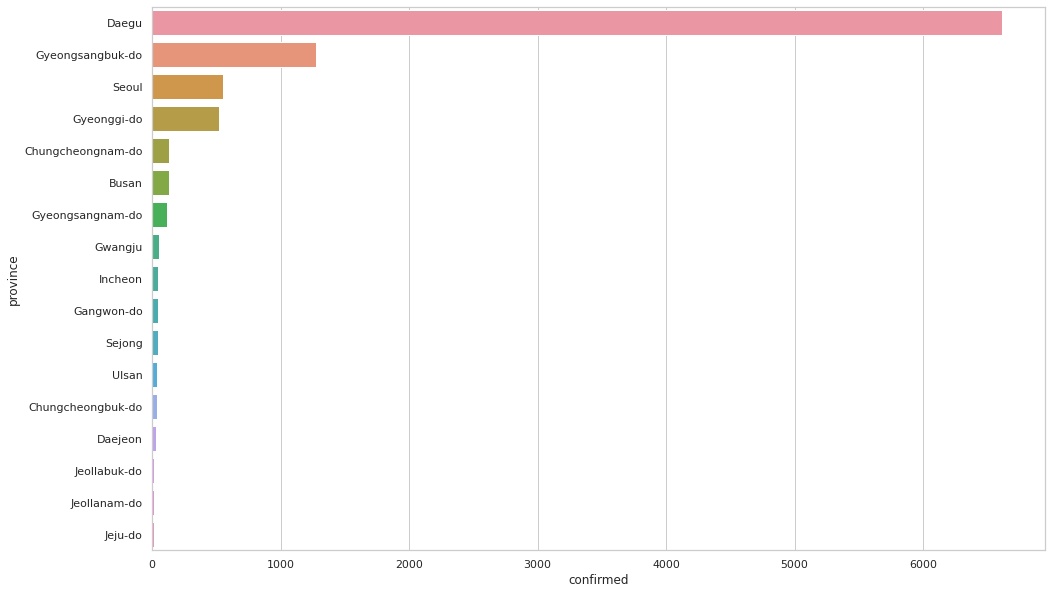

In [244]:
%matplotlib inline
plt.figure(figsize=(16, 10))

province_case = case[['province', 'confirmed']]
province_case_group = province_case.groupby('province').sum()
province_case_group.reset_index(inplace=True)
province_case_group = province_case_group.sort_values('confirmed', ascending=False)

sns.barplot(y = "province",
            x = 'confirmed',
            data = province_case_group)

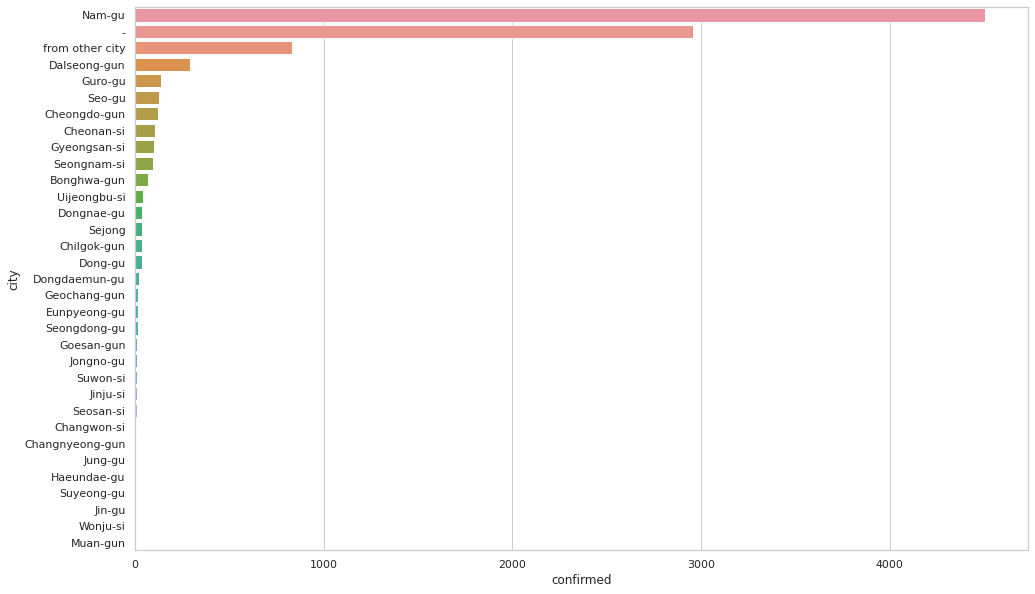

In [245]:
plt.figure(figsize=(16, 10))
city_case = case[['city', 'confirmed']]
city_case_group = city_case.groupby('city').sum()
city_case_group.reset_index(inplace=True)
city_case_group = city_case_group.sort_values('confirmed', ascending=False)

sns.barplot(y = "city",
            x = 'confirmed',
            data = city_case_group)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Text(0, 0.5, 'City')

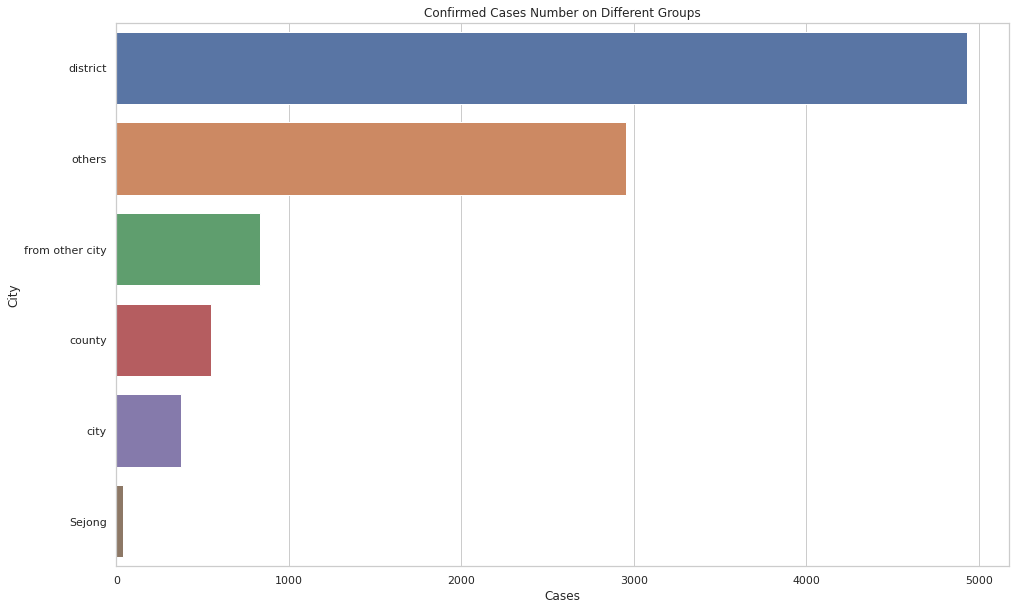

In [262]:
plt.figure(figsize=(16, 10))

city_case = case[['city', 'confirmed']]
city_case.loc[city_case['city'].str.endswith('-si'), 'city'] = 'city'
city_case.loc[city_case['city'].str.endswith('-gu'), 'city'] = 'district'
city_case.loc[city_case['city'].str.endswith('-gun'), 'city'] = 'county'
city_case.loc[city_case['city'].str.endswith('-'), 'city'] = 'others'

city_case_group = city_case.groupby('city').sum()
city_case_group.reset_index(inplace=True)
city_case_group = city_case_group.sort_values('confirmed', ascending=False)

graph = sns.barplot(y = "city",
            x = 'confirmed',
            data = city_case_group)
plt.title("Confirmed Cases Number on Different Groups")
plt.xlabel('Cases')
plt.ylabel('City')

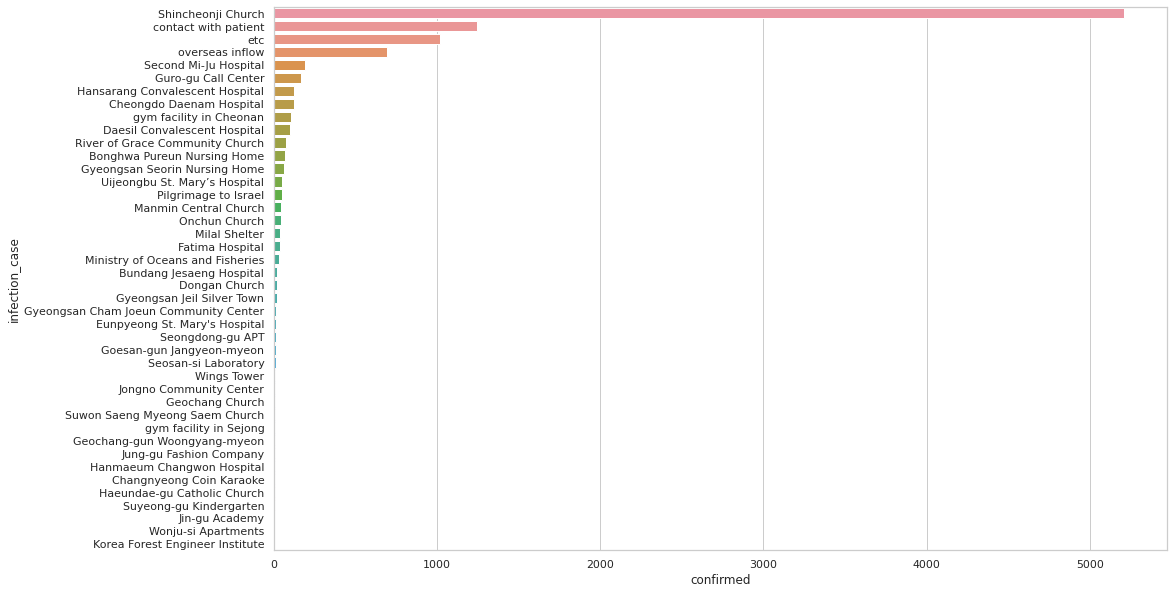

In [251]:
plt.figure(figsize=(16, 10))
infection_case = case[['infection_case', 'confirmed']]
infection_case_group = infection_case.groupby('infection_case').sum()
infection_case_group.reset_index(inplace=True)
infection_case_group = infection_case_group.sort_values('confirmed', ascending=False)

sns.barplot(y = "infection_case",
            x = 'confirmed',
            data = infection_case_group)